    # Output CN plot

In [10]:
import matplotlib
import matplotlib.pyplot as plt
# imports
import json
import scgenome.plotting as pl
import h5py
import anndata
import numpy as np

In [11]:
import os
print(os.getcwd())


/Users/haraldme/git/Lagergren Lab/CopyTree/VICTree/victree/src/experiments


In [38]:
# read output h5
# out_file = h5py.File('/Users/zemp/phd/scilife/cpt_experiments/output/spectr006/out_k6a7n1314m6206.h5') # 006
#out_file = h5py.File('../../output/P01-066/K6L100i200s0p1/victree.out.h5ad') # 014
base_path = "../../tests/test_output/experiments/fixed_tree_experiments/VICtreeFixedTreeExperiment/fixed_tree_real_data_experiment"
data_set = "K8_A7_rho1.0_niter50_SVI0_sigma_softprior"
experiment_seed = "seed_0"
path = os.path.join(base_path, data_set)
path = os.path.join(path, experiment_seed)

out_file = anndata.read_h5ad(os.path.join(path, 'victree.out.h5ad')) # 014
model_file = h5py.File(os.path.join(path, 'victree.model.h5')) # 014
with open(os.path.join(path, "victree.config.json")) as file:
    config_file = json.load(file)

print(f'out file keys: {out_file}')
print(f'model file keys: {model_file.keys()}')
print(f'config keys: {config_file}')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../../tests/test_output/experiments/fixed_tree_experiments/VICtreeFixedTreeExperiment/fixed_tree_real_data_experiment/K10_A7_rho1.0_niter50_SVI0/lambda010000.0_alpha500.0_beta50.0_delta3.0/seed_4/victree.out.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [31]:
print(out_file.layers.keys())
print(out_file.obs.keys())

KeysView(Layers with keys: victree-cn-marginal, victree-cn-viterbi)
Index(['victree-mu', 'victree-mt-lambda', 'victree-mt-alpha',
       'victree-mt-beta', 'victree-tau', 'victree-clone'],
      dtype='object')


In [32]:
# get cell assignment and cell copy number
top_z = out_file.obsm['victree-clone-probs'][...].argmax(axis=1)
clone_cn_np = out_file.layers['victree-cn-marginal'][...].argmax(axis=-1)
cell_cn = clone_cn_np[top_z, :]

In [33]:
from utils import factory_utils

qC = factory_utils.construct_qCMultiChrome_from_model_output_data(model_file)
qC.compute_filtering_probs()
print(qC.single_filtering_probs[1, 0:3])

In [34]:
# create anndata
# adata = anndata.read_h5ad('/Users/zemp/Downloads/data/signals_SPECTRUM-OV-006.h5')
adata = anndata.read_h5ad('../../data/x_data/P01-066_cn_data.h5ad')
# adata = anndata.read_h5ad('/Users/zemp/Downloads/data/signals_SPECTRUM-OV-107.h5')


adata.obs['clone'] = top_z

(683, 6206)
(683, 6206)


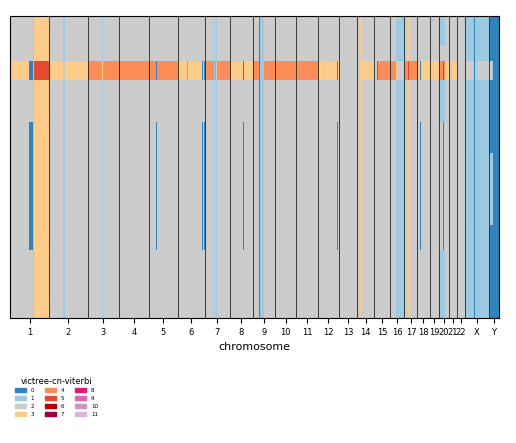

In [35]:
print(cell_cn.shape)
print(clone_cn_np.shape)

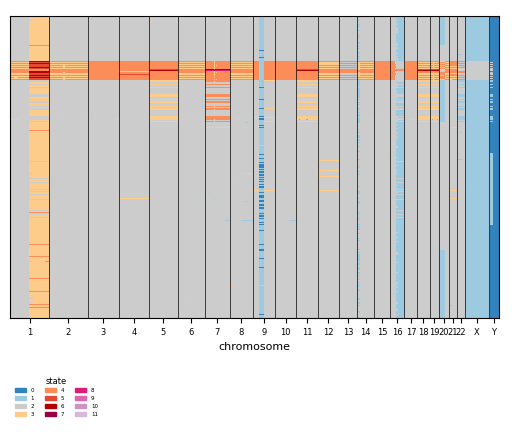

In [36]:
from utils import visualization_utils
matplotlib.use('Qt5Agg')
qC_marginals_np = qC.single_filtering_probs.numpy()
qC_argmax = qC_marginals_np.argmax(axis=-1)
#visualization_utils.visualize_copy_number_profiles_ipynb()
import matplotlib.pyplot as plt

print(qC_argmax[5, 5000:5200])

<Axes: xlabel='chromosome'>

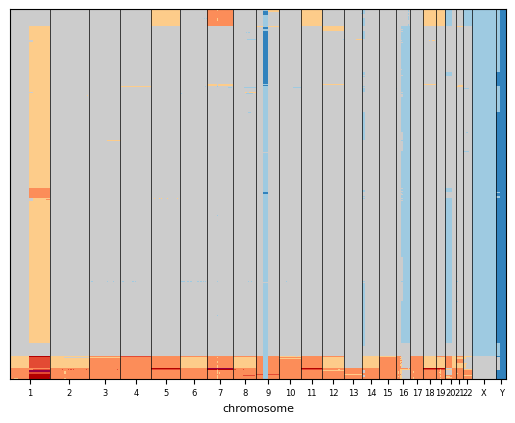

In [29]:
%matplotlib inline
#out_file.layers['victree-cn-marginal'] = cell_qc.get_viterbi()[1:].numpy()
g = pl.plot_cell_cn_matrix_fig(out_file, 'victree-cn-viterbi', cell_order_fields=['victree-clone'], max_cn=7)

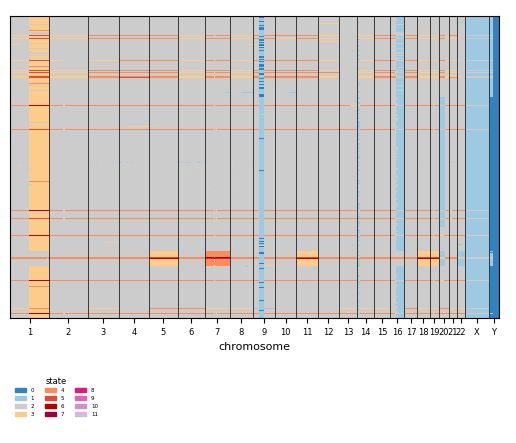

In [11]:
adata.obs['victree-clone'] = out_file.obs['victree-clone']
g = pl.plot_cell_cn_matrix_fig(adata, 'state', cell_order_fields=['clone'])

KeyError: 'marginal'

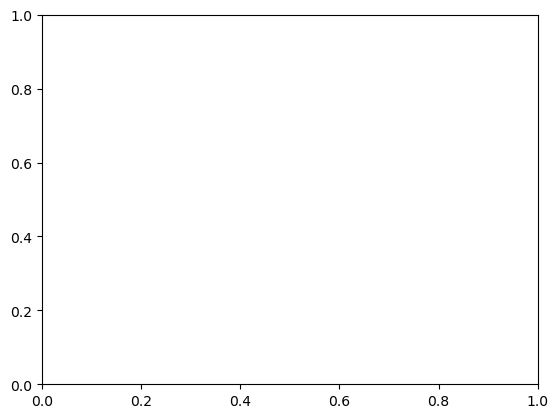

In [18]:
pl.plot_cell_cn_matrix(adata, 'marginal', cell_order_fields=['clone'], max_cn=7)['ax']

In [49]:
adata.obs_keys()

['multiplier',
 'MSRSI_non_integerness',
 'MBRSI_dispersion_non_integerness',
 'MBRSM_dispersion',
 'autocorrelation_hmmcopy',
 'cv_hmmcopy',
 'empty_bins_hmmcopy',
 'mad_hmmcopy',
 'mean_hmmcopy_reads_per_bin',
 'median_hmmcopy_reads_per_bin',
 'std_hmmcopy_reads_per_bin',
 'total_mapped_reads_hmmcopy',
 'total_halfiness',
 'scaled_halfiness',
 'mean_state_mads',
 'mean_state_vars',
 'mad_neutral_state',
 'breakpoints',
 'mean_copy',
 'state_mode',
 'log_likelihood',
 'true_multiplier',
 'percent_duplicate_reads',
 'standard_deviation_insert_size',
 'sample_type',
 'overlap_with_all_filters',
 'unpaired_duplicate_reads',
 'fastqscreen_salmon_multihit',
 'index_i5',
 'unpaired_mapped_reads',
 'fastqscreen_mouse',
 'pick_met',
 'index_i7',
 'mean_insert_size',
 'fastqscreen_salmon',
 'library_id',
 'index_sequence',
 'estimated_library_size',
 'coverage_depth',
 'is_contaminated',
 'fastqscreen_mouse_multihit',
 'total_reads',
 'column',
 'total_properly_paired',
 'median_insert_size',


<Axes: xlabel='chromosome'>

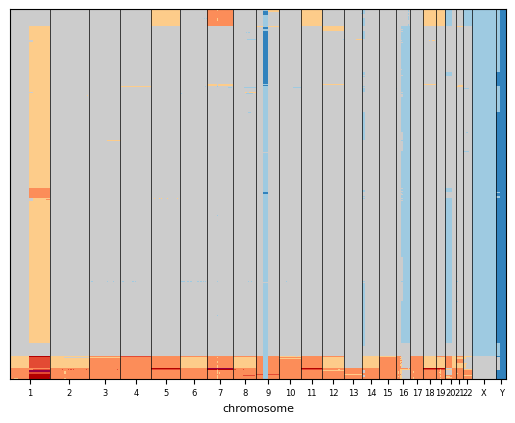

In [50]:
# sort cells based on cluster assignment
pl.plot_cell_cn_matrix(adata, 'state', cell_order_fields=['clustering_order'], max_cn=7)['ax']

In [31]:
import numpy as np
np.unique(top_z, return_counts=True)

(array([0, 5]), array([724, 381]))

In [32]:
out_file['result']['trees'].keys()

<KeysViewHDF5 ['newick', 'weight']>

In [33]:

for t in zip(out_file['result']['trees']['newick'], out_file['result']['trees']['weight']):
    print(t[0])
    print(t[1])
    print('---')

b'((2,(1,5)4)3)0'
0.02043939
---
b'((((5)2)1,3)4)0'
0.013640878
---
b'(((5)1,(3)2)4)0'
0.013598051
---
b'(1,(2,(5)3)4)0'
0.013593179
---
b'((2,(3)4)1,5)0'
0.013571922
---
b'((3,5)2,(1)4)0'
0.013564752
---
b'(2,(1,4)3,5)0'
0.01355846
---
b'((1,4)2,3,5)0'
0.013556236
---
b'((2,((5)3)4)1)0'
0.013550264
---
b'((1)2,(4,5)3)0'
0.013547564
---
b'((1,(3)2,5)4)0'
0.013543362
---
b'(((4,5)2,3)1)0'
0.013538791
---
b'(((2,3)4,5)1)0'
0.0135366
---
b'((1,(2,5)4)3)0'
0.0135211
---
b'((4)1,(2,5)3)0'
0.013488823
---
b'(((3)1,5)2,4)0'
0.013478719
---
b'(1,(((5)2)4)3)0'
0.013476964
---
b'((2,(3,5)4)1)0'
0.013476209
---
b'(2,((1,5)4)3)0'
0.0134605905
---
b'(((2,(5)4)1)3)0'
0.01343996
---
b'((3,5)1,(4)2)0'
0.0134385275
---
b'(((5)2,3)1,4)0'
0.013409871
---
b'(((3)1)2,(5)4)0'
0.013383034
---
b'((2)1,(5)3,4)0'
0.013311512
---
b'(((3,(1)4)2)5)0'
0.012144192
---
b'(((1,(4)2)3)5)0'
0.012141792
---
b'(((1,2,4)3)5)0'
0.012141299
---
b'((((4)1,2)3)5)0'
0.01205685
---
b'((((1)5)2,3)4)0'
0.012046414
---
b'(((((1)5)3